<a href="https://colab.research.google.com/github/Sonal-kumar1998/ANN_Based_Device_Modelling/blob/main/Model_evaluation_constant_stepsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # import libraries



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
global model           # neural network model 
global Test_datapath
global Training_datapath
model_feature = "1010"
layer = 2
model= load_model('/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/Model/Vb0V_1_' + model_feature + ".h5")
if layer == 3:
  layer_folder = "Three_hidden_layer"
if layer == 2:
  layer_folder = "Two_hidden_layer"

In [ ]:
#print(unique(Training_datapath)["gate_voltage"][:, :]) # print first 3 unique gate_voltage 

#Conversion function  at output of neural network

In [ ]:
#Inverse of the conversion function
def inv_con_fn(vds, x):
  I_0 = 10**(-12) 
  x = np.power(10,x)
  x = np.multiply(x,vds)
  x  = I_0*x
  return x

#Plot the ANN model prediction and TCAD simulation at constant gate volatge

---




Drain current verse drain voltage in training dataset

In [ ]:
def drain_current_visualization(data, gates, Vg_range = [0,2], leg = "upper left"):
  vg = "vd_" + str(Vg_range[0]) + "-" + str(Vg_range[1])
  data  = data[0]
  colors = "bgrcmyk"
  for i, (vds , tcad , ann) in enumerate(data):
    plt.plot(vds, tcad, marker = "o", markersize = 3, color = colors[i] ,label = "Vgs = "+ str(gates[i])) 
    plt.plot(vds, ann,  color = colors[i])
  plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plt.ylabel('Drain Current(Id)')
  plt.xlabel('Drain_Volatge(Vg)')
  plt.title("Id verse Vd")
  plt.grid(b=True, which='both', axis='both')
  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vd/"+ layer_folder+ "/Id_Vd" + str(model_feature) + vg + ".png")
  plt.show()

Relative error vs drain voltage

In [ ]:
def error_visualization_min(data, gates, Vg_range= [0,2], leg = "upper left", y_axis = [-5,5]):
  vg = "vd_" + str(Vg_range[0]) + "-" + str(Vg_range[1])
  errors = data[1]
  colors = "bgrcmyk"
  for i, (vds , error) in enumerate(errors):
    plt.plot(vds, error, color = colors[i] , markersize = 4, label = "Vgs = "+ str(gates[i]))
  plt.ylabel('Relative Error(%)')
  plt.xlabel('Drain_Voltage(Vd)')
  plt.ylim(y_axis[0], y_axis[1])
  plt.grid(b=True, which='both', axis='both')
  #plt.xticks(np.arange(0, 10, 1))
  plt.title("Relative error(%) Vs Drain Voltage")
  plt.yticks(np.arange(y_axis[0], y_axis[1], 1))
  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vd/"+ layer_folder+ "/error_min" + str(model_feature) + vg + ".png")
  plt.show()

In [ ]:
def error_visualization_max(data, gates, Vg_range= [0,2], leg = "upper left", y_axis = [-5,5] , yscale = 1):
  vg = "vd_" + str(Vg_range[0]) + "-" + str(Vg_range[1])
  errors = data[1]
  colors = "bgrcmyk"
  for i, (vds , error) in enumerate(errors):
    plt.plot(vds, error, color = colors[i] , markersize = 4, label = "Vgs = "+ str(gates[i]))
  plt.ylabel('Relative Error(%)')
  plt.xlabel('Drain_Voltage(Vd)')
  plt.ylim(y_axis[0], y_axis[1])
  plt.grid(b=True, which='both', axis='both')
  #plt.xticks(np.arange(0, 10, 1))
  plt.title("Relative error(%) Vs Drain Voltage")
  plt.yticks(np.arange(y_axis[0], y_axis[1], yscale))
  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vd/"+ layer_folder+ "/error_max" + str(model_feature) + vg + ".png")
  plt.show()

Data for id verse vd at constant step size

In [ ]:
def drain_current_constant_Vgs(gates , path , min_drain_voltage = 0 ):
  Training_data = pd.read_csv(path)
  errors = []
  datas = []
  for gate in gates:
    plot_data = Training_data[Training_data['#"gate OuterVoltage"'] == gate]
    plot_data = plot_data[(plot_data['drain OuterVoltage'] > min_drain_voltage)]
    plot_data_1 = plot_data[(plot_data['drain OuterVoltage'] <= 3 )]
    plot_data_2 = plot_data[(plot_data['drain OuterVoltage'] > 3 )]
    Vd1 =  plot_data_1['drain OuterVoltage']
    Vd2 =  plot_data_2['drain OuterVoltage']

    plot_vd1 = [Vd1.iloc[i] for i in range(1, plot_data_1.shape[0] ,20)]
    plot_vd2 = [Vd2.iloc[i] for i in range(1, plot_data_2.shape[0],5)]
    Vd = plot_vd1 + plot_vd2

    plot = plot_data.loc[plot_data['drain OuterVoltage'].isin(Vd)]
    input_col = ['V_gs','V_ds', 'V_bs']            #  input feature column
    input =  plot[input_col]
    y_predict = model.predict(input)

    output = ['converted_Ids']                 # output feature column
    output = plot[output]
    vd = plot["drain OuterVoltage"]
    vds = ['V_ds']
    V_ds = plot[vds]
    #V_ds = V_ds.reshape(V_ds.shape[0],1)
    V_ds.shape
    tcad = inv_con_fn(V_ds, output)
    ann= inv_con_fn(V_ds, y_predict)
    datas.append((vd, tcad, ann))
    error = 100*(tcad["converted_Ids"] - ann["V_ds"])/tcad["converted_Ids"]
    errors.append((vd ,error))
  return [datas ,errors]

In [ ]:
def drain_current_constant_Vgs_max(gates , path , max_drain = 1):
  Training_data = pd.read_csv(path)
  errors = []
  datas = []
  for gate in gates:
    plot_data = Training_data[Training_data['#"gate OuterVoltage"'] == gate]
    #plot_data = plot_data[(plot_data['drain OuterVoltage'] < max_drain)]
    plot_data_1 = plot_data[(plot_data['drain OuterVoltage'] <=  max_drain )]
    #plot_data_2 = plot_data[(plot_data['drain OuterVoltage'] > 3 )]


    Vd1 =  plot_data_1['drain OuterVoltage']
    #Vd2 =  plot_data_2['drain OuterVoltage']

    plot_vd1 = [Vd1.iloc[i] for i in range(1, plot_data_1.shape[0] ,1)]
    #plot_vd2 = [Vd2.iloc[i] for i in range(1, plot_data_2.shape[0],5)]
    Vd = plot_vd1 

    plot = plot_data.loc[plot_data['drain OuterVoltage'].isin(Vd)]
    input_col = ['V_gs','V_ds', 'V_bs']            #  input feature column
    input =  plot[input_col]
    y_predict = model.predict(input)

    output = ['converted_Ids']                 # output feature column
    output = plot[output]
    vd = plot["drain OuterVoltage"]
    vds = ['V_ds']
    V_ds = plot[vds]
    #V_ds = V_ds.reshape(V_ds.shape[0],1)
    V_ds.shape
    tcad = inv_con_fn(V_ds, output)
    ann= inv_con_fn(V_ds, y_predict)
    datas.append((vd, tcad, ann))
    error = 100*(tcad["converted_Ids"] - ann["V_ds"])/tcad["converted_Ids"]
    errors.append((vd ,error))
  return [datas ,errors]

Visuallization of drain current verse drain voltage

Training evaluation

In [ ]:
Training_datapath = "/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_3/training_data_set.csv"
drain_vol = 0.25

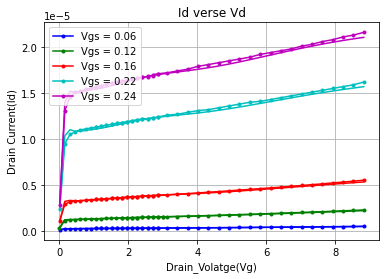

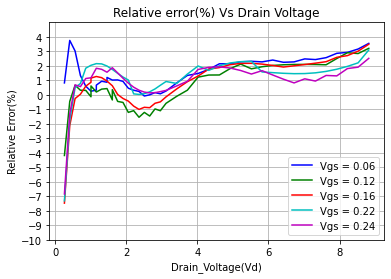

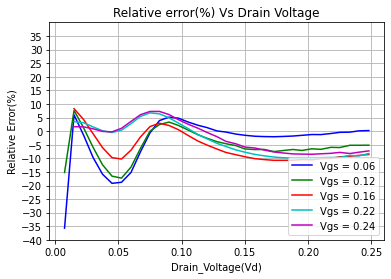

In [ ]:
# 0.   0.02 0.04 0.06 0.08 0.12 0.14 0.16 0.18 0.22 0.24 0.26 0.28
gates1 = [0.06, 0.12, 0.16, 0.22, 0.24]
data1 = drain_current_constant_Vgs(gates1, Training_datapath, min_drain_voltage = 0 )
drain_current_visualization(data1 , gates1, Vg_range= [0,0.25],leg = "upper left")
data1 = drain_current_constant_Vgs(gates1, Training_datapath, min_drain_voltage = drain_vol)
error_visualization_min(data1 , gates1, Vg_range= [0,0.25] , leg = "lower right", y_axis = [-10,5])

data1 = drain_current_constant_Vgs_max(gates1, Training_datapath, max_drain = drain_vol)
error_visualization_max(data1 , gates1, Vg_range = [0,0.25] , leg = "lower right", y_axis = [-40,40], yscale = 5)

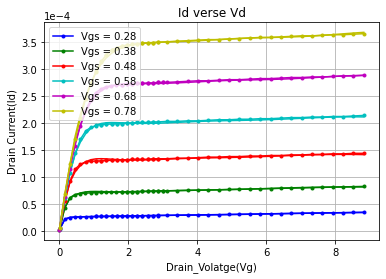

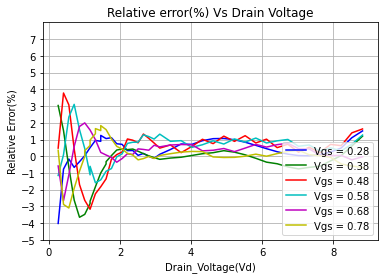

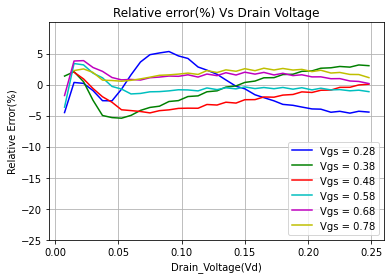

In [ ]:
# 0.32 0.34 0.36 0.38 0.42 0.44 0.46 0.48 0.52 0.54 0.56 0.58 0.62 0.64 0.66 0.68 0.72 0.74 0.76 0.78 0.82 0.84 0.86 0.88
gates2 = [0.28, 0.38, 0.48, 0.58, 0.68, 0.78]
data2 = drain_current_constant_Vgs(gates2, Training_datapath, min_drain_voltage = 0 )
drain_current_visualization(data2, gates2, Vg_range= [0.25, 0.8],leg = "upper left")
data2 = drain_current_constant_Vgs(gates2, Training_datapath, min_drain_voltage = drain_vol)
error_visualization_min(data2 , gates2, Vg_range= [0.25, 0.8] , leg = "lower right", y_axis = [-5,8])

data2 = drain_current_constant_Vgs_max(gates2, Training_datapath, max_drain = drain_vol)
error_visualization_max(data2, gates2, Vg_range = [0.25, 0.8] , leg = "lower right", y_axis = [-25,10],yscale = 5)

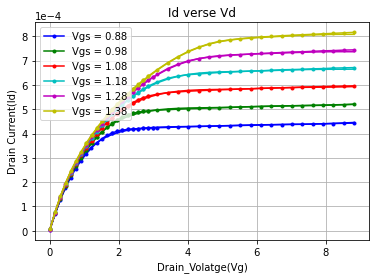

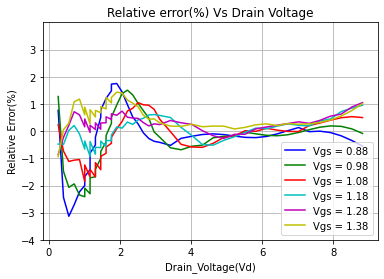

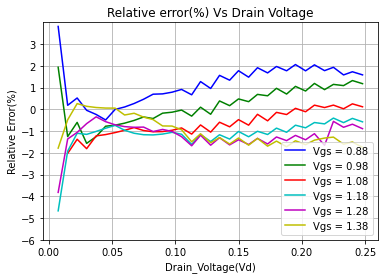

In [ ]:
#0.82 0.84 0.86 0.88 0.92 0.94 0.96 0.98 1.02 1.04 1.06 1.08 1.12 1.14 1.16 1.18 1.22 1.24 1.26 1.28 1.32 1.34 1.36 1.38 
gates3 = [0.88, 0.98, 1.08, 1.18, 1.28, 1.38]
data3 = drain_current_constant_Vgs(gates3, Training_datapath, min_drain_voltage = 0 )
drain_current_visualization(data3, gates3, Vg_range= [0.8, 1.4],leg = "upper left")
data3 = drain_current_constant_Vgs(gates3, Training_datapath, min_drain_voltage = drain_vol)
error_visualization_min(data3 , gates3, Vg_range= [0.8, 1.4] , leg = "lower right", y_axis = [-4,4])

data3 = drain_current_constant_Vgs_max(gates3, Training_datapath, max_drain = drain_vol)
error_visualization_max(data3, gates3, Vg_range = [0.8, 1.4] , leg = "lower right", y_axis = [-6,4] ,yscale = 1)

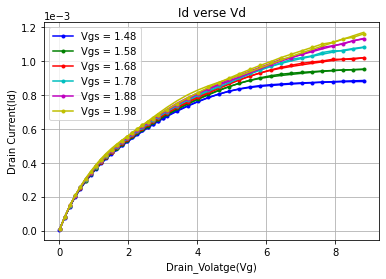

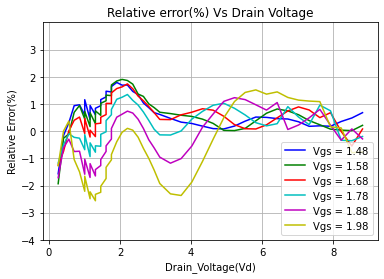

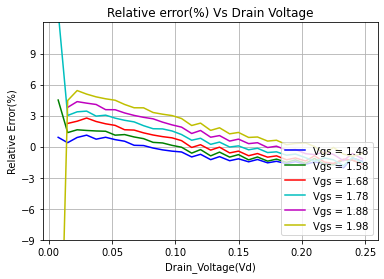

In [ ]:
# 1.42 1.44 1.46 1.48 1.52 1.54 1.56 1.58 1.62 1.64 1.66 1.68 1.72 1.74 1.76 1.78 1.82 1.84 1.86 1.88 1.92 1.94 1.96 1.98
gates4 = [1.48, 1.58, 1.68, 1.78, 1.88, 1.98]
data4 = drain_current_constant_Vgs(gates4, Training_datapath, min_drain_voltage = 0 )
drain_current_visualization(data4, gates4, Vg_range = [1.4, 2], leg = "upper left")
data4 = drain_current_constant_Vgs(gates4, Training_datapath, min_drain_voltage = drain_vol)
error_visualization_min(data4 , gates4, Vg_range= [1.4, 2] , leg = "lower right", y_axis = [-4,4])

data4 = drain_current_constant_Vgs_max(gates4, Training_datapath, max_drain = drain_vol)
error_visualization_max(data4, gates4, Vg_range = [1.4,2] , leg = "lower right", y_axis = [-9,12] ,yscale = 3)

Drain current verse gate voltage in training dataset


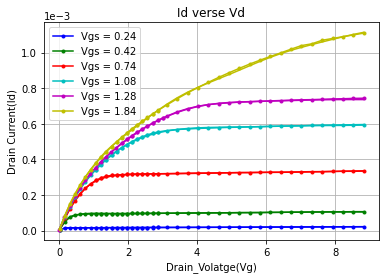

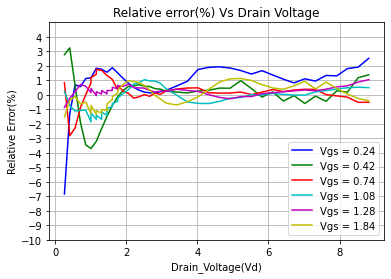

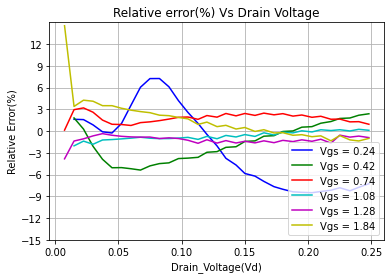

In [ ]:
gates0 = [0.24, 0.42, 0.74, 1.08, 1.28, 1.84]
data0 = drain_current_constant_Vgs(gates0, Training_datapath, min_drain_voltage = 0 )
drain_current_visualization(data0 , gates0, Vg_range= [0,2],leg = "upper left")
data0 = drain_current_constant_Vgs(gates0, Training_datapath, min_drain_voltage = drain_vol)
error_visualization_min(data0 , gates0, Vg_range= [0,2] , leg = "lower right", y_axis = [-10,5])

data0 = drain_current_constant_Vgs_max(gates0, Training_datapath, max_drain = drain_vol)
error_visualization_max(data0, gates0, Vg_range = [0, 2] , leg = "lower right", y_axis = [-15,15] ,yscale = 3)



#Plot the ANN model prediction and TCAD simulation at constant drain volatge




In [ ]:
def drain_current_constant_Vds(drain_voltages , Training_datapath , min_vg = 0):
  errors = []
  datas = []
  colors = "bgrcmyk"
  ann_data = pd.read_csv(Training_datapath)
  for i, drain in enumerate(drain_voltages):
      plot_data = ann_data[ann_data['drain OuterVoltage'] == drain]
      plot_data = plot_data.sort_values(by=['#"gate OuterVoltage"'])
      plot_data = plot_data[(plot_data['#"gate OuterVoltage"'] > min_vg)]
      input = ['V_gs','V_ds', 'V_bs']            #  input feature column
      output = ['converted_Ids']                 # output feature column
      voltage = ['V_gs']
      vds = ['V_ds']

      #######_____input feature and output feature_______########
      input =  plot_data[input]
      output = plot_data[output]
      ######_____predication of ANN model________##########
      y_predict = model.predict(input)
      ####### variable bias voltage
      V_gs = plot_data[voltage]
      V_ds = plot_data[vds]
      #######______inver_conversion of output of the ANN model_____#########
      tcad_id = inv_con_fn(V_ds, output)
      ann_id = inv_con_fn(V_ds, y_predict)

      Vgs = [V_gs.iloc[i] for i in range(2, output.shape[0], 3)]
      tcad = [tcad_id.iloc[i] for i in range(2, output.shape[0], 3)]
      ann = [ann_id.iloc[i] for i in range(2, output.shape[0], 3)]
      # plt.plot(Vgs, tcad, marker = "o", color=colors[i], markersize = 4 ,label = "Vds = "+ str(drain)) 
      # plt.plot(Vgs, ann, color=colors[i] , markersize = 4)
      datas.append((Vgs,tcad,ann))
      
      Vgs1 = pd.to_numeric(Vgs, errors ='ignore')
      TCAD_id1 = pd.to_numeric(tcad, errors ='ignore')
      ANN_id1 = pd.to_numeric(ann, errors ='ignore')
      error = (ANN_id1 - TCAD_id1)/TCAD_id1*100
      errors.append((Vgs1, error))
  return [datas, errors]


In [ ]:
def drain_current_constant_Vds_max(drain_voltages , Training_datapath , max_vg = 1):
  errors = []
  datas = []
  colors = "bgrcmyk"
  ann_data = pd.read_csv(Training_datapath)
  for i, drain in enumerate(drain_voltages):
      plot_data = ann_data[ann_data['drain OuterVoltage'] == drain]
      plot_data = plot_data.sort_values(by=['#"gate OuterVoltage"'])
      plot_data = plot_data[(plot_data['#"gate OuterVoltage"'] < max_vg)]
      input = ['V_gs','V_ds', 'V_bs']            #  input feature column
      output = ['converted_Ids']                 # output feature column
      voltage = ['V_gs']
      vds = ['V_ds']

      #######_____input feature and output feature_______########
      input =  plot_data[input]
      output = plot_data[output]
      ######_____predication of ANN model________##########
      y_predict = model.predict(input)
      ####### variable bias voltage
      V_gs = plot_data[voltage]
      V_ds = plot_data[vds]
      #######______inver_conversion of output of the ANN model_____#########
      tcad_id = inv_con_fn(V_ds, output)
      ann_id = inv_con_fn(V_ds, y_predict)

      Vgs = [V_gs.iloc[i] for i in range(2, output.shape[0], 1)]
      tcad = [tcad_id.iloc[i] for i in range(2, output.shape[0], 1)]
      ann = [ann_id.iloc[i] for i in range(2, output.shape[0], 1)]
      # plt.plot(Vgs, tcad, marker = "o", color=colors[i], markersize = 4 ,label = "Vds = "+ str(drain)) 
      # plt.plot(Vgs, ann, color=colors[i] , markersize = 4)
      datas.append((Vgs,tcad,ann))
      
      Vgs1 = pd.to_numeric(Vgs, errors ='ignore')
      TCAD_id1 = pd.to_numeric(tcad, errors ='ignore')
      ANN_id1 = pd.to_numeric(ann, errors ='ignore')
      error = (ANN_id1 - TCAD_id1)/TCAD_id1*100
      errors.append((Vgs1, error))
  return [datas, errors]


In [ ]:
def error_visualization_max(data, drain_voltages, Vd_range = [0,9], leg = "lower right", y_axis = [-5,5], yscale = 1):
  vd = "vd_" + str(Vd_range[0]) + "-" + str(Vd_range[1])
  errors = data[1]
  colors = "bgrcmyk"
  for i, (vgs , error) in enumerate(errors):
    plt.plot(vgs, error, color = colors[i] , markersize = 4, label = "Vds = "+ str(drain_voltages[i]))
  #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plt.ylabel('Relative error(%)')
  plt.xlabel('gate_Volatge(Vg)')
  plt.ylim(y_axis[0], y_axis[1])
  plt.grid(b=True, which='both', axis='both')
  plt.title("Relative error(%) verse gate_Volatge(Vg)")
  # plt.xticks(np.arange(0, 10, 1))
  plt.yticks(np.arange(y_axis[0], y_axis[1], yscale))
  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vg/"+ layer_folder+ "/error_max" + str(model_feature) + vd + ".png")
  plt.show()

In [ ]:
def error_visualization_min(data, drain_voltages, Vd_range = [0,9], leg = "lower right", y_axis = [-5,5]):
  vd = "vd_" + str(Vd_range[0]) + "-" + str(Vd_range[1])
  errors = data[1]
  colors = "bgrcmyk"
  for i, (vgs , error) in enumerate(errors):
    plt.plot(vgs, error, color = colors[i] , markersize = 4, label = "Vds = "+ str(drain_voltages[i]))
  #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plt.ylabel('Relative error(%)')
  plt.xlabel('gate_Volatge(Vg)')
  plt.ylim(y_axis[0], y_axis[1])
  plt.grid(b=True, which='both', axis='both')
  plt.title("Relative error(%) verse gate_Volatge(Vg)")
  # plt.xticks(np.arange(0, 10, 1))
  plt.yticks(np.arange(y_axis[0], y_axis[1], 2))
  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vg/"+ layer_folder+ "/error_min" + str(model_feature) + vd + ".png")
  plt.show()

In [ ]:
def drain_current_visualization(data, drain_voltages, Vd_range = [0,9], leg = "lower right"):
  vd = "vd_" + str(Vd_range[0]) + "-" + str(Vd_range[1])
  data  = data[0]
  colors = "bgrcmyk"
  for i, (vgs , tcad , ann) in enumerate(data):
    plt.plot(vgs, tcad, marker = "o", markersize = 3, color = colors[i] ,label = "Vds = "+ str(drain_voltages[i])) 
    plt.plot(vgs, ann,  color = colors[i])
  plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plt.ylabel('Drain current(Id)')
  plt.xlabel('Gate_Volatge(Vg)')
  plt.title("Id verse Vg")
  plt.grid(b=True, which='both', axis='both')

  if leg == "lower right":
    plt.legend(loc ="lower right")
  elif leg == "lower left":
    plt.legend(loc ="lower left")
  elif leg == "upper right":
    plt.legend(loc ="upper right")
  elif leg == "upper left":
    plt.legend(loc ="upper left")
  elif leg == "lower center":
    plt.legend(loc ="lower center")
  elif leg == "upper center":
    plt.legend(loc ="upper center")
  plt.savefig("/content/drive/MyDrive/DDP/Dataset/Vb0V/Vb0V_1/plot_Id_vg/"+ layer_folder+ "/Id_Vg" + str(model_feature) + vd + ".png")
  plt.show()

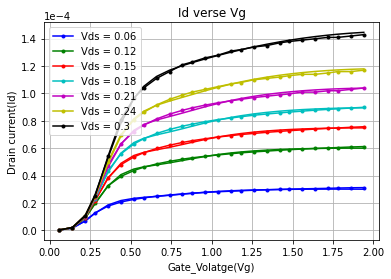

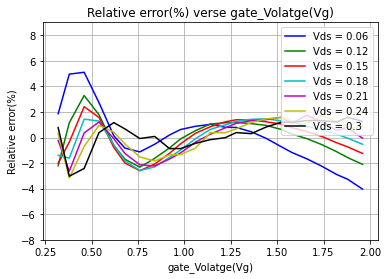

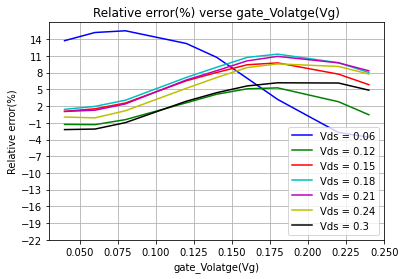

In [ ]:
drain_0 = [0.06, 0.12, 0.15, 0.18, 0.21, 0.24, 0.3]
plot_data = drain_current_constant_Vds(drain_0, Training_datapath)
drain_current_visualization(plot_data, drain_0, Vd_range = [0,0.3], leg = "upper left")
plot_data = drain_current_constant_Vds(drain_0, Training_datapath , min_vg = 0.25)
error_visualization_min(plot_data, drain_0, Vd_range = [0,0.3], leg = "upper right", y_axis = [-8,9])

plot_data = drain_current_constant_Vds_max(drain_0, Training_datapath, max_vg = 0.25)
error_visualization_max(plot_data, drain_0, Vd_range = [0,0.3], leg = "lower right", y_axis = [-22,17], yscale = 3)

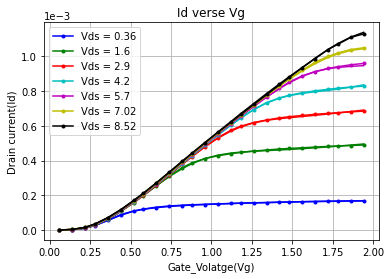

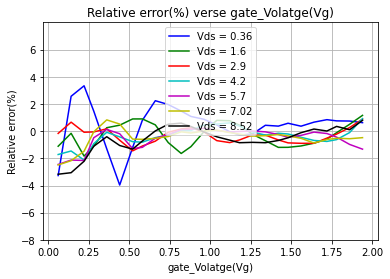

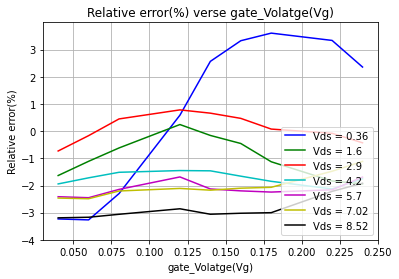

In [ ]:
drain_1 = [0.36,1.6, 2.9, 4.2 , 5.7, 7.02, 8.52]
plot_data = drain_current_constant_Vds(drain_1, Training_datapath, min_vg = 0)
drain_current_visualization(plot_data, drain_1, Vd_range = [0,9], leg = "upper left")
error_visualization_min(plot_data, drain_1, Vd_range = [0,9], leg = "upper center", y_axis = [-8,8])

plot_data = drain_current_constant_Vds_max(drain_1, Training_datapath, max_vg = 0.25)
error_visualization_max(plot_data, drain_1, Vd_range = [0,0.3], leg = "lower right", y_axis = [-4,4], yscale = 1)

#Unique is function which return dictionary of unique value

In [ ]:
# input argument global path variable
# return dictnary of the unique value
def unique(path):
  value = {}
  data = pd.read_csv(path)
  data = data[data['#"gate OuterVoltage"'] != '#"gate OuterVoltage"']
  unique_gate_volt = data['#"gate OuterVoltage"'].unique()
  unique_gate_volt = unique_gate_volt.reshape(unique_gate_volt.shape[0],1)
  unique_drain_volt = data['drain OuterVoltage'].unique()
  unique_drain_volt = unique_drain_volt.reshape(unique_drain_volt.shape[0],1)
  value["drain_voltage"] = unique_drain_volt.reshape(1,unique_drain_volt.shape[0])
  value["gate_voltage"] =np.sort(unique_gate_volt.reshape(1,unique_gate_volt.shape[0]))
  return value

Unique Drain_voltage and gate_voltage in Test dataset

In [ ]:
#print(unique(Test_datapath)["drain_voltage"][:,:50]) # print first 3 unique drain volatge
#print(unique(Test_datapath)["gate_voltage"][:, :]) # print first 3 unique gate_voltage 

Unique Drain_voltage and gate_voltage in Training dataset

In [ ]:
print(unique(Training_datapath)["drain_voltage"][:, :]) # print first 3 unique gate_voltage

[[-9.50e-42  7.50e-03  1.50e-02  2.25e-02  3.00e-02  3.75e-02  4.50e-02
   5.25e-02  6.00e-02  6.75e-02  7.50e-02  8.25e-02  9.00e-02  9.75e-02
   1.05e-01  1.13e-01  1.20e-01  1.28e-01  1.35e-01  1.43e-01  1.50e-01
   1.58e-01  1.65e-01  1.73e-01  1.80e-01  1.88e-01  1.95e-01  2.03e-01
   2.10e-01  2.18e-01  2.25e-01  2.33e-01  2.40e-01  2.48e-01  2.55e-01
   2.63e-01  2.70e-01  2.78e-01  2.85e-01  2.93e-01  3.00e-01  3.08e-01
   3.15e-01  3.23e-01  3.30e-01  3.38e-01  3.45e-01  3.53e-01  3.60e-01
   3.68e-01  3.75e-01  3.83e-01  3.90e-01  3.98e-01  4.05e-01  4.13e-01
   4.20e-01  4.28e-01  4.35e-01  4.43e-01  4.50e-01  4.58e-01  4.65e-01
   4.73e-01  4.80e-01  4.88e-01  4.95e-01  5.03e-01  5.10e-01  5.18e-01
   5.25e-01  5.33e-01  5.40e-01  5.48e-01  5.55e-01  5.63e-01  5.70e-01
   5.78e-01  5.85e-01  5.93e-01  6.00e-01  6.08e-01  6.15e-01  6.23e-01
   6.30e-01  6.38e-01  6.45e-01  6.53e-01  6.60e-01  6.68e-01  6.75e-01
   6.83e-01  6.90e-01  6.98e-01  7.05e-01  7.13e-01  7.20e-01  7